# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**.

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Notebook Presentation

In [94]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [95]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [96]:
print(f"The data has {data.shape[0]} rows and {data.shape[1]} columns.")

The data has 5391 rows and 6 columns.


In [97]:
print(data.isnull().sum())
print("The dataframe has no NaN values.")

Rank                     0
Release_Date             0
Movie_Title              0
USD_Production_Budget    0
USD_Worldwide_Gross      0
USD_Domestic_Gross       0
dtype: int64
The dataframe has no NaN values.


In [98]:
data.duplicated().sum()
print("The dataframe has no duplicate rows.")

The dataframe has no duplicate rows.


In [99]:
print(f"The datatypes of the columns is: {data.columns.dtype}")

The datatypes of the columns is: object


### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`.
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [100]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


In [101]:
# Convert Prod. Budget
data['USD_Production_Budget'] = data['USD_Production_Budget'].str.replace('$', '').str.replace(',', '')
data['USD_Production_Budget'] = pd.to_numeric(data['USD_Production_Budget'])
# Convert Worldwide gross
data['USD_Worldwide_Gross'] = data['USD_Worldwide_Gross'].str.replace('$', '').str.replace(',', '')
data['USD_Worldwide_Gross'] = pd.to_numeric(data['USD_Worldwide_Gross'])
# Convert Domestic gross
data['USD_Domestic_Gross'] = data['USD_Domestic_Gross'].str.replace('$', '').str.replace(',', '')
data['USD_Domestic_Gross'] = pd.to_numeric(data['USD_Domestic_Gross'])

In [102]:
print(f"Domestic Gross data type: {data['USD_Domestic_Gross'].dtype}")
print(f"USD Prod. Budget Data type: {data['USD_Production_Budget'].dtype}")
print(f"Worldwide Gross Data type: {data['USD_Worldwide_Gross'].dtype}")

Domestic Gross data type: int64
USD Prod. Budget Data type: int64
Worldwide Gross Data type: int64


**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type.

In [103]:
data['Release_Date'] = pd.to_datetime(data['Release_Date'])
print(f"Release date column datatype: {data['Release_Date'].dtype}")

Release date column datatype: datetime64[ns]


### Descriptive Statistics

**Challenge**:

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [104]:
avg_prod_budget = data['USD_Production_Budget'].mean()
print(f"The average production budget of the films in the data set is ${avg_prod_budget:,.2f}")

The average production budget of the films in the data set is $31,113,737.58


In [105]:
avg_worldwide_gross = data['USD_Worldwide_Gross'].mean()
print(f"The average worldwide gross revenue of films is ${avg_worldwide_gross:,.2f}")

The average worldwide gross revenue of films is $88,855,421.96


In [106]:
min_worldwide_gross = data['USD_Worldwide_Gross'].min()
min_domestic_gross = data['USD_Domestic_Gross'].min()
print(f"The minimum worldwide gross revenue is ${min_worldwide_gross:,.2f}")
print(f"The minimum domestic gross revenue is ${min_domestic_gross:,.2f}")

The minimum worldwide gross revenue is $0.00
The minimum domestic gross revenue is $0.00


In [107]:
threshold = data['USD_Worldwide_Gross'].quantile(0.25)
bottom_25 = data.loc[data['USD_Worldwide_Gross'] <= threshold]
bottom_25.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
1,5140,1916-05-09,Intolerance,385907,0,0
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
6,4630,1927-12-08,Wings,2000000,0,0
8,4240,1930-01-01,Hell's Angels,4000000,0,0
9,5043,1931-12-31,Mata Hari,558000,900000,900000


# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [108]:
zero_US_gross_films = data.where(data['USD_Domestic_Gross'] == 0)
print(f"There are {zero_US_gross_films.count()['Movie_Title']} films that grossed $0 domestically.")

There are 512 films that grossed $0 domestically.


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [109]:
zero_worldwide_gross_films = data.where(data['USD_Worldwide_Gross'] == 0)
print(f"There are {zero_worldwide_gross_films.count()['Movie_Title']} films that grossed $0 Worldwide.")

There are 357 films that grossed $0 Worldwide.


### Filtering on Multiple Conditions

In [110]:
films_good_worldwide_bad_US = data.loc[(data['USD_Worldwide_Gross'] > 0) & (data['USD_Domestic_Gross'] == 0)]
print(f"There are {films_good_worldwide_bad_US.count()['Movie_Title']} international films.")

There are 155 international films.


**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States.

Hint: This time you'll have to use the `and` keyword.

In [111]:
international_releases = data.query('USD_Worldwide_Gross > 0 and USD_Domestic_Gross == 0')
print(f"There are {international_releases.count()['Movie_Title']} international films.")

There are 155 international films.


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office?
* Create another DataFrame called data_clean that does not include these films.

In [112]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [113]:
unreleased_films = data.query('Release_Date > @scrape_date')
print(f"There are {unreleased_films.count()['Movie_Title']} films that were not released yet.")

There are 7 films that were not released yet.


In [114]:
data_clean = data.query('Release_Date <= @scrape_date').copy()

### Films that Lost Money

**Challenge**:
What is the percentage of films where the production costs exceeded the worldwide gross revenue?

In [115]:
films_that_lost_money = data_clean.query('USD_Production_Budget > USD_Worldwide_Gross')
print(f"There are {films_that_lost_money.count()['Movie_Title']} films that lost money.")
percentage_films_lost_money = (films_that_lost_money.count()['Movie_Title'] / data_clean.count()['Movie_Title']) * 100
print(f"The percentage of films that lost money is {percentage_films_lost_money:.2f}%.")

There are 2007 films that lost money.
The percentage of films that lost money is 37.28%.


# Seaborn for Data Viz: Bubble Charts

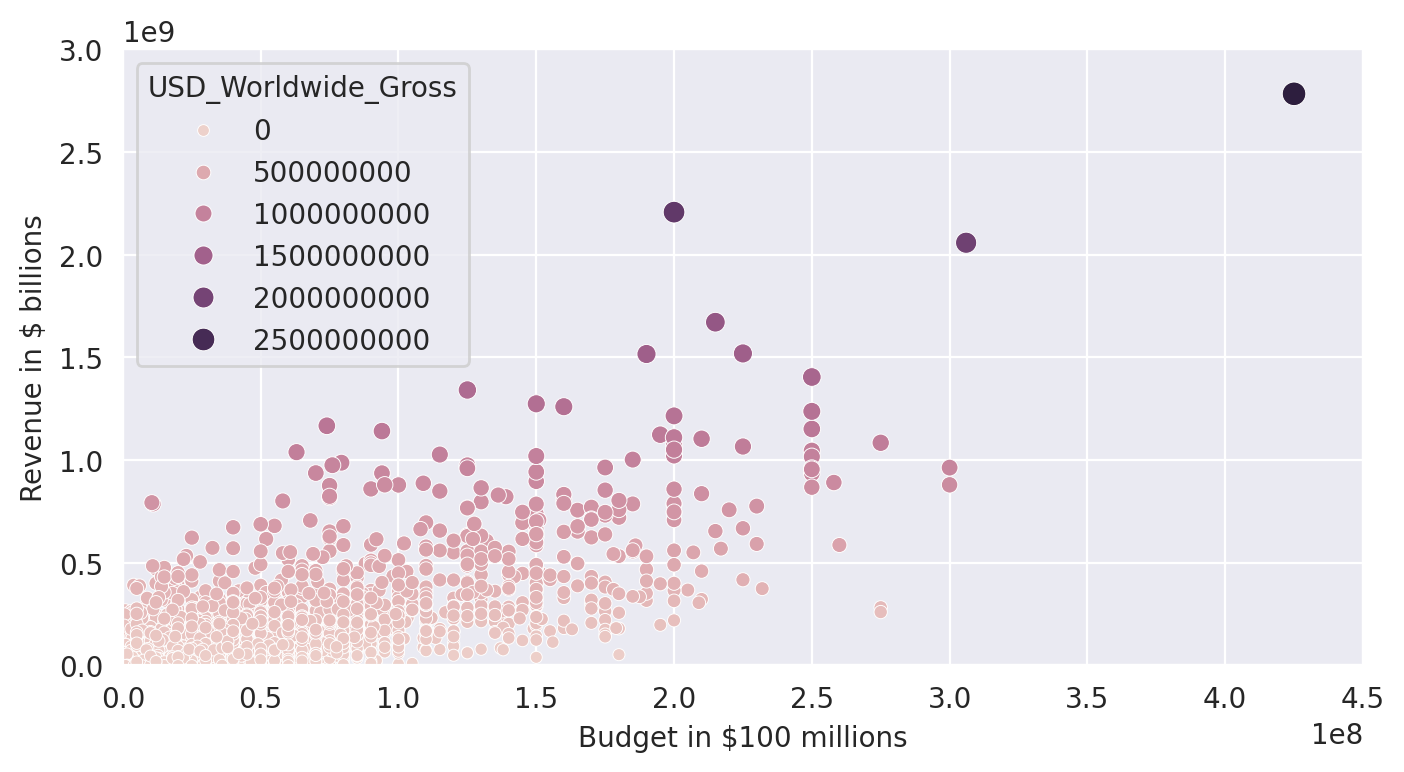

In [116]:
plt.figure(figsize=(8,4), dpi=200)

# set styling on a single chart
with sns.axes_style('darkgrid'):
  ax = sns.scatterplot(data=data_clean,
                       x='USD_Production_Budget',
                       y='USD_Worldwide_Gross',
                       hue='USD_Worldwide_Gross',
                       size='USD_Worldwide_Gross')

  ax.set(ylim=(0, 3000000000),
        xlim=(0, 450000000),
        ylabel='Revenue in $ billions',
        xlabel='Budget in $100 millions')

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



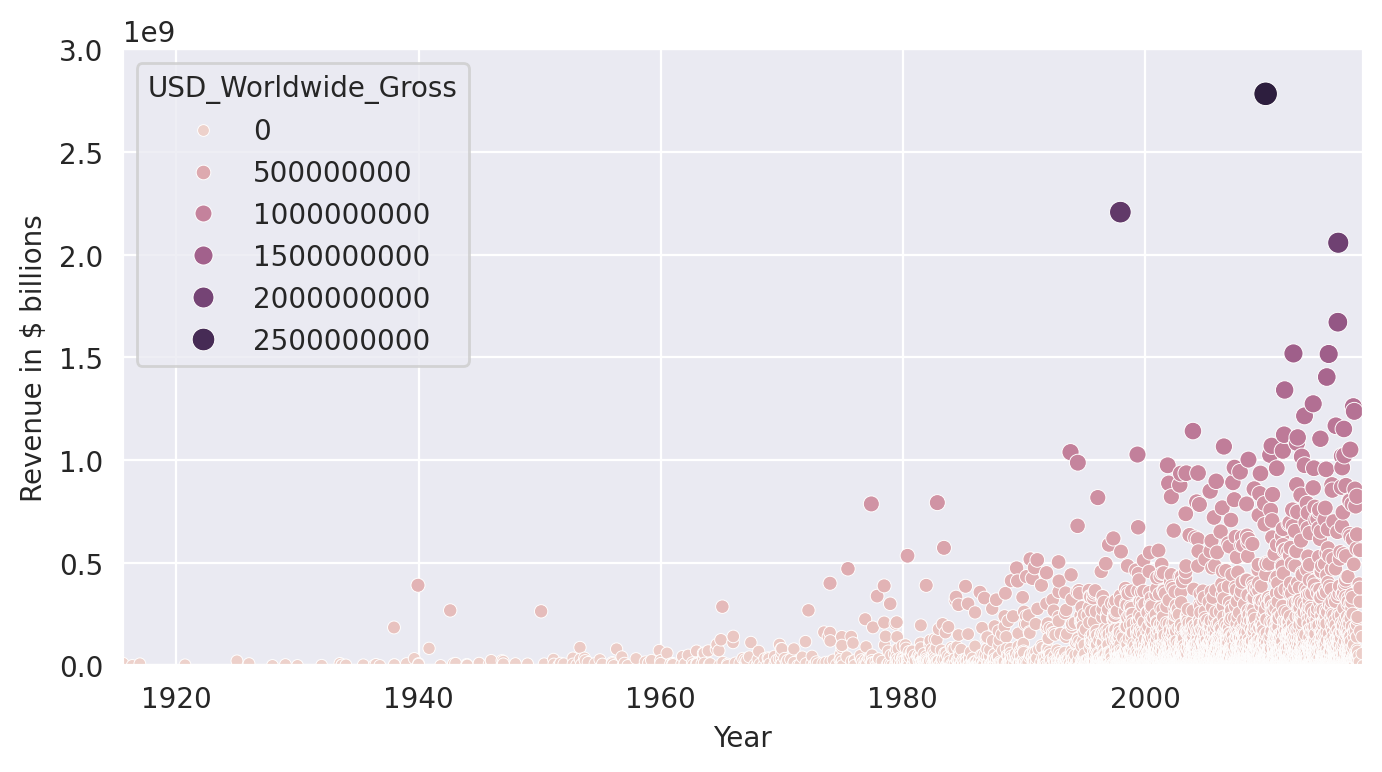

In [117]:
plt.figure(figsize=(8,4), dpi=200)

# set styling on a single chart
with sns.axes_style('darkgrid'):
  ax = sns.scatterplot(data=data_clean,
                       x='Release_Date',
                       y='USD_Worldwide_Gross',
                       hue='USD_Worldwide_Gross',
                       size='USD_Worldwide_Gross')
  ax.set(ylim=(0, 3000000000),
         xlim=(data_clean['Release_Date'].min(), data_clean['Release_Date'].max()),
        ylabel='Revenue in $ billions',
        xlabel='Year')

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release.

<img src=https://i.imgur.com/0VEfagw.png width=650>

Here's how:
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column.
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [118]:
release_date_index = pd.DatetimeIndex(data_clean['Release_Date'])
years = release_date_index.year
decades = years // 10 * 10
data_clean['Decade'] = decades
data_clean.head(10)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920
5,4250,1925-12-30,Ben-Hur,3900000,9000000,9000000,1920
6,4630,1927-12-08,Wings,2000000,0,0,1920
7,5141,1929-01-02,The Broadway Melody,379000,4358000,2800000,1920
8,4240,1930-01-01,Hell's Angels,4000000,0,0,1930
9,5043,1931-12-31,Mata Hari,558000,900000,900000,1930


### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [119]:
old_films = data_clean.where(data_clean['Decade'] <= 1969).dropna()
new_films = data_clean.where(data_clean['Decade'] >= 1970).dropna()
print(f"Number of films released BEFORE 1970: {old_films.count()['Movie_Title']}")
print(f"Number of films released AFTER 1970: {new_films.count()['Movie_Title']}")

Number of films released BEFORE 1970: 153
Number of films released AFTER 1970: 5231


# Seaborn Regression Plots

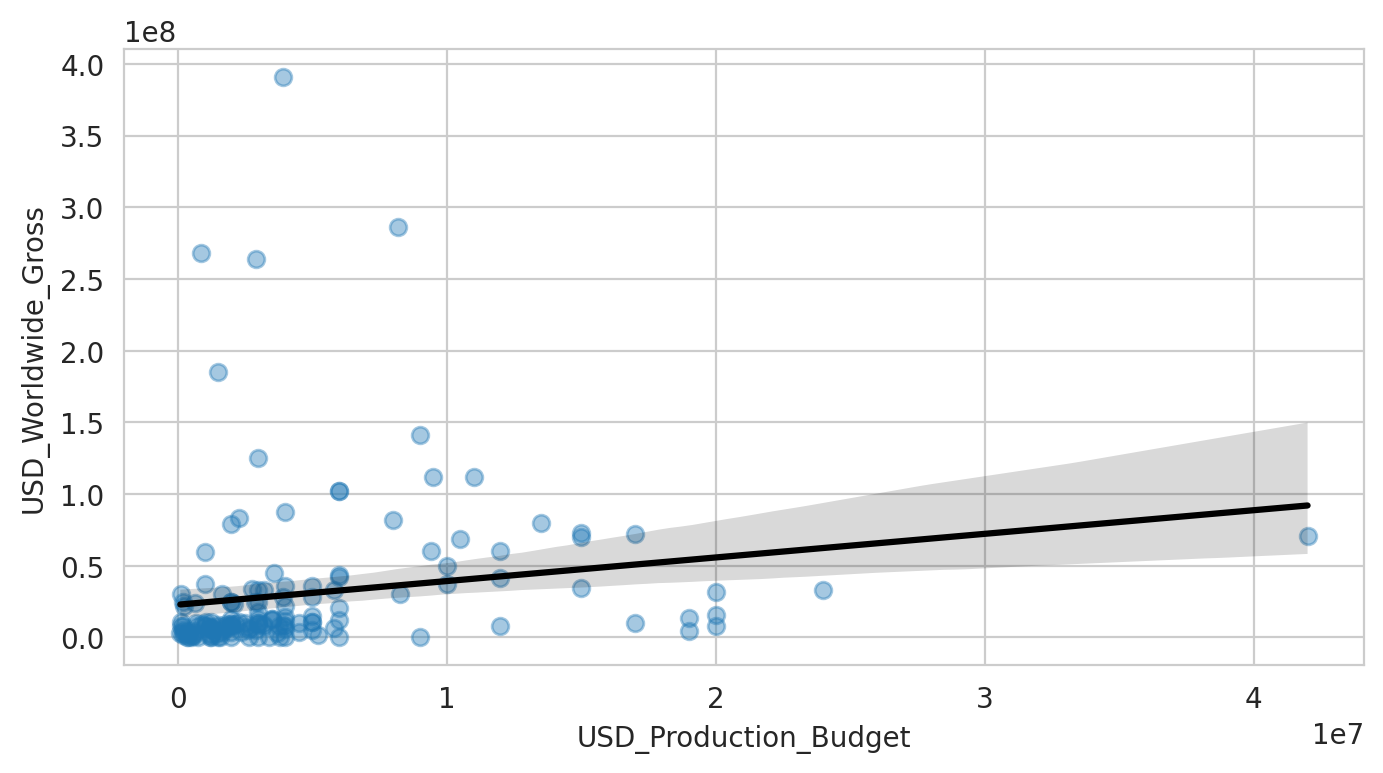

In [120]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
  ax = sns.regplot(data=old_films,
            x='USD_Production_Budget',
            y='USD_Worldwide_Gross',
            scatter_kws = {'alpha': 0.4},
            line_kws = {'color': 'black'})

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`.
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

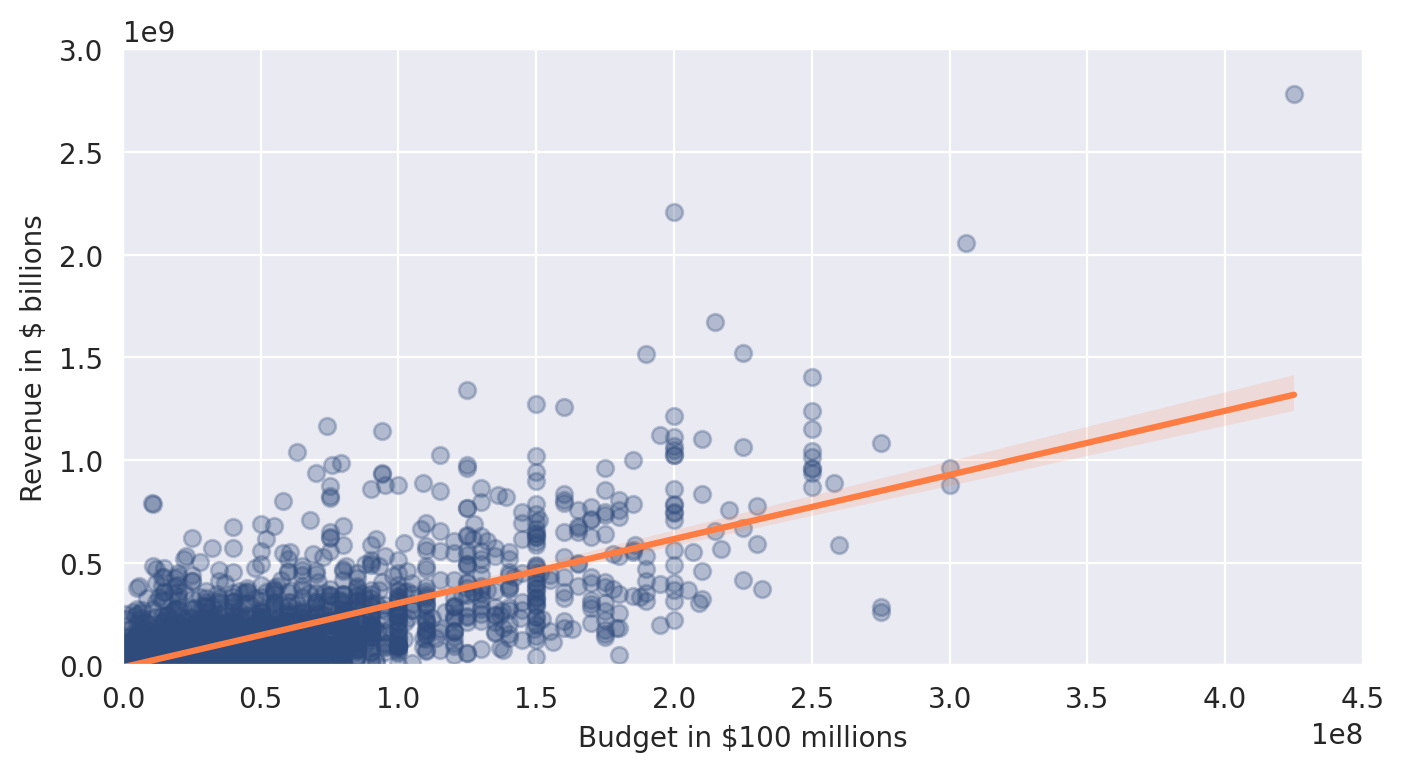

In [121]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('darkgrid'):
  ax = sns.regplot(data=new_films,
                   x='USD_Production_Budget',
                   y='USD_Worldwide_Gross',
                   color='#2f4b7c',
                   scatter_kws = {'alpha': 0.3},
                   line_kws = {'color': '#ff7c43'})

  ax.set(ylim=(0, 3000000000),
         xlim=(0, 450000000),
         ylabel='Revenue in $ billions',
         xlabel='Budget in $100 millions')

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [122]:
regression = LinearRegression()

In [123]:
# Explanatory Variable(s) or Feature(s)
X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])

# Response Variable or Target
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross'])

In [124]:
# Find the best-fit line
regression.fit(X, y)

LinearRegression()

In [125]:
# R-squared
regression.score(X, y)

0.5577032617720403

In [126]:
print(f"The intercept is: {regression.intercept_}")
print(f"The co-efficient is: {regression.coef_}")

The intercept is: [-8650768.00661027]
The co-efficient is: [[3.12259592]]


**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [127]:
another_X = pd.DataFrame(old_films, columns=['USD_Production_Budget'])
another_y = pd.DataFrame(old_films, columns=['USD_Worldwide_Gross'])

In [128]:
# Best fit line
regression.fit(another_X, another_y)

LinearRegression()

In [129]:
# R-squared
regression.score(another_X, another_y)

0.02937258620576877

In [133]:
# Y intercept and co-efficient
print(f"The intercept is: {regression.intercept_[0]}")
print(f"The co-efficient is: {regression.coef_[0]}")

The intercept is: 22821538.635080386
The co-efficient is: [1.64771314]


# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million?

In [136]:
budget = 350000000
revenue_estimate = regression.intercept_[0] + regression.coef_[0,0]*budget
revenue_estimate = round(revenue_estimate, -6)
print(f'The estimated revenue for a 350 million dollar film is around ${revenue_estimate:.10}')

The estimated revenue for a 350 million dollar film is around $600000000.0
